<a href="https://colab.research.google.com/github/Ut-kaikai/monodukurikensyu/blob/main/ex04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 航空宇宙情報システム学第一 小課題4

## 出題: 12月8日 , 期限: 1月5日

## 課題内容


### **(1)** 10桁2進数の（文字列の）リスト
10桁の2進数は、0000000000から1111111111まで計$2^{10}=1024$個あります。この1024個の2進数の**文字列**のリストを作ってください。つまり、リストの名前を`binlist`とした場合、
```
binlist = ['0000000000','0000000001', ..(途中略).. , '1111111111']
```
のようになります。リスト内の順番は自由で構いません。

* **(ヒント)**
この問題は色々なやり方があるので、まず自分で方法を考えてもらいたいのですが、もし、やり方が思いつかない場合は、0から1023までの10進数を2進数の文字列に変換する方法を試してみてください。
10進数の数`i` を **n桁の2進数の文字列** に変換するには、`format()`関数を使って、
`format(i,'010b')` とするのが楽です。例えば、10進数の999は、
```
>>> format(999,'10b')
'1111100111'
```
のように求まります。

### **(2)** '0'と'1'を5個ずつ含む10桁2進数文字列のリスト
**0と1を5個ずつ含む2進数の文字列のリスト**を作ってください。そのような2進数の個数は、${}_{10}C_5 = 252$ (個)となるはずです。

* **(ヒント)** 前問で求めた1024個の10桁2進数文字列のリストに対するfilter処理と考えることができます。それ以外にも再帰呼び出しを使う方法、探索木(ちょっと高度)を使う方法などもあります。

### **(3)** 前問題の答えを10進数に直したリスト
**0と1を5個ずつ含む2進数**を**10進数**に直した整数のリストを作ってください。

* **(ヒント)** 前問で求めたリストに対するmap処理と考えることができます。また、2進数文字列`bstr`から10進数への変換は、`int(bstr,2)`を使うのが楽ですが、`divmod()`などを使って実装するのも面白いと思います。


## ボーナス課題(任意提出): 余裕のある人はやってみてください。

### **(4)** 出発地点からゴールまでの経路コストのリスト

下の図のような格子状の街路ネットワークで、原点(0,0)から、<font color="red">右に計5回、上に計5回進むことで</font>、ゴール(5,5)に到達する経路（道順）を考えるとします。
そのような経路のパターンの数は、「10回のうち5回右に進み5回上に進む」組み合わせの数ですから、**(2)** と同じく、${}_{10}C_5 = 252$通りになります。特に、<font color="blue">右に進むのを'0'</font>、<font color="red">上に進むのを'1'</font>で表せば、**(2)**で求めた252個の10桁2進数の文字列がその252通りの経路を表現することになります。

また、図の中に記されている<font color="blue">青数字は**右へ**の移動コスト</font>、<font color="red">赤数字は**上へ**の移動コスト</font>を表しています。
ここで、<font color="blue">点$(i,j)$から点$(i+1,j)$への右移動コストは、`h[i][j]` で参照でき</font>、<font color="red">点$(i,j)$から点$(i,j+1)$への上移動コストは、`v[i][j]`</font> で参照できます。

例えば、
$$
(0,0)\xrightarrow{右}(1,0)\xrightarrow{右}(2,0)\xrightarrow{右}(3,0)\xrightarrow{右}(4,0)\xrightarrow{右}(5,0) \\
\xrightarrow{上}(5,1)\xrightarrow{上}(5,2)\xrightarrow{上}(5,3)\xrightarrow{上}(5,4)\xrightarrow{上}(5,5)
$$
という経路(2進数文字列で表せば、'0000011111')の移動コストは、
```
>>> h[0][0]+h[1][0]+h[2][0]+h[3][0]+h[4][0]+v[5][0]+v[5][1]+v[5][2]+v[5][3]+v[5][4]
184
```
のように求めることができます。

このとき、252経路の移動コストのリストを求めてください。また、移動コストが最小の経路、最大の経路を、2進数文字列で表現したものを求めてください。


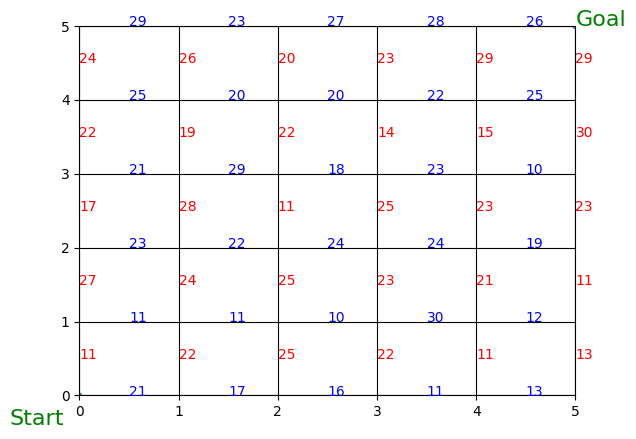

In [ ]:
#@title
# 横方向の各辺のコスト
# 横方向の各辺のコスト
h = [[21, 11, 23, 21, 25, 29],
     [17, 11, 22, 29, 20, 23],
     [16, 10, 24, 18, 20, 27],
     [11, 30, 24, 23, 22, 28],
     [13, 12, 19, 10, 25, 26]]
# 縦方向の各辺のコスト
v = [[11, 27, 17, 22, 24],
     [22, 24, 28, 19, 26],
     [25, 25, 11, 22, 20],
     [22, 23, 25, 14, 23],
     [11, 21, 23, 15, 29],
     [13, 11, 23, 30, 29]]
import matplotlib.pyplot as plt
plt.plot([0.0,5.0],[0.0,5.0],'.')
[[plt.text(i+0.5,j,str(h[i][j]),color='blue') for i in range(5)] for j in range(6)]
[[plt.text(i,j+0.5,str(v[i][j]),color='red') for i in range(6)] for j in range(5)]
plt.text(-0.7,-0.4,'Start',color='g',fontsize=16)
plt.text(5,5,'Goal',color='g',fontsize=16)
plt.xlim((0,5))
plt.ylim((0,5))
plt.grid(True,color='black')